## ICP07 Neural Networks comparing models with Logestic regression

In this exercise I will compare the performance of three different modeling approaches(Neural networks and Logestiv regressions) at predicting handwritten numbers.



We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import collections


from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Let's look at the frequency of each digit in the data set. This will allow us to see if the data set is balanced or not.

In [5]:
import collections

counts = collections.Counter(mnist.target)
counts

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

We can look at the count of each digit using a histogram as well...

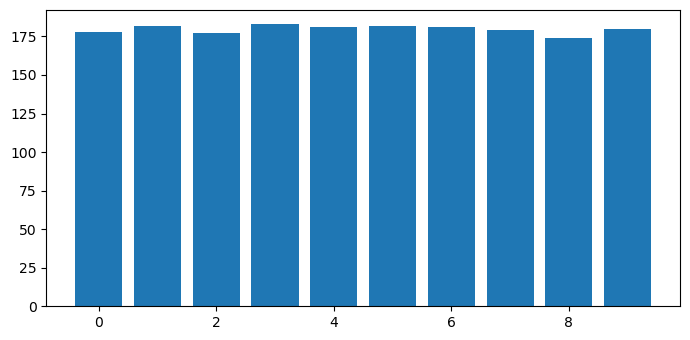

In [6]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(counts.keys(), counts.values())

# Display the plot
plt.show()

Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [7]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [8]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

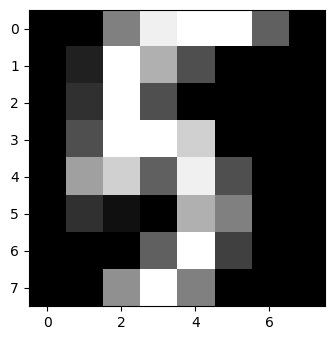

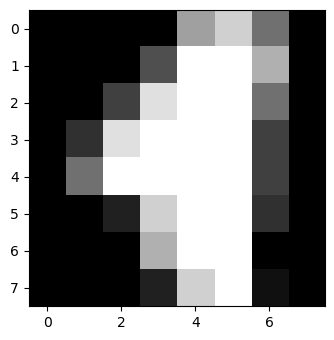

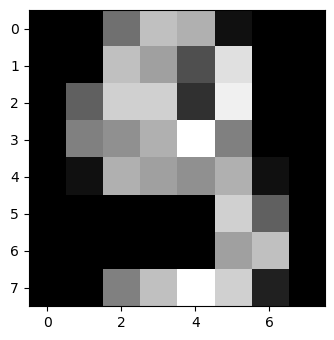

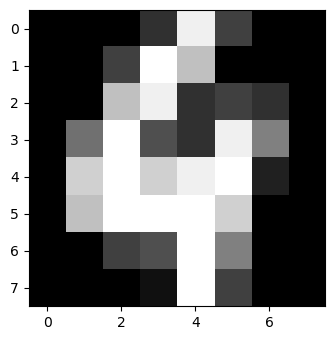

In [10]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


Now that we understand data splitting, we can now use this in our model building process.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

## Normalize/Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

### Neural Net

In [13]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 8.67 s
Wall time: 20.7 s


In [14]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


Sinc this is a multi-class target (0 through 9), our confusion matrix is a 10x10 matrix.

In [15]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

## Interpretting Multi-Class Confusion Matrix

Interpretting a multi-class confusion matrix is a bit more complicated than a binary confusion matrix. The issue is how to 'aggregate' the results. Micro-averaging and macro-averaging are two common approaches. 

* In micro-averaging, we simply sum up all the cells in the confusion matrix and then compute the metric (accuracy, recall, precision, f1-score). 
* In macro-averaging, we compute the metric (accuracy, recall, precision, f1-sscore) for each class and then average the results. 

The difference between macro and micro averaging is that macro averaging gives equal weight to each category while micro averaging gives equal weight to each sample. If we have the same number of samples for each class, both macro and micro will provide the same score.

For example, if we had a 3-class problem with the following actual and predicted values

In [16]:
actual =    [0,0,1,1,0,2,2,2,0,1]
predicted = [0,1,1,0,0,2,1,2,2,1]

The confusion matrix for this would be:

In [17]:
c_matrix = confusion_matrix(actual, predicted)
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

**ACCURACY**
  * The micro-averaged accuracy would be ```0.60``` (sum of the diagonal divided by all total of all cells). 
    * (2) + (2) + (2) = 6
    * (2+1+1) + (1+2+0) + (0+1+2) = 10
    * 6/10 = 0.60
  * The macro-averaged accuracy would be ```0.94``` (average of the accuracy of each class prediction - each row). 
    * ((2/4) + (2/3) + (1/3)) / 3 = (.5+.66666+.33)/3 = 0.5
  * The weighted marco average accuraccy woudl be ```0.6``` (average of the accuracy of each class prediction weighted by the number of samples in each class). 
    * ((2/4)*4 + (2/3)*3 + (1/3)*3) / 3 = (2+2+1)/3 = 0.6
  * *NOTE1: For a multi-class problem, the accuracy is the same as the micro f1-score.*
  * *NOTE2: For a multi-class problem, the micro and weighted macro accuracy are the same.*

In [18]:
accuracy = np.sum(np.diag(c_matrix)) / np.sum(c_matrix)
accuracy

0.6

In [19]:
accuracy_score(actual, predicted)

0.6

In [20]:
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [21]:
confusion_matrix(actual, predicted)

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [22]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.61      0.61      0.60        10
weighted avg       0.62      0.60      0.60        10



**RECALL**
  * The micro-averaged recall would be ```0.600``` (sum of all cells divided by the sum of the row totals). 
    * 2 + 2 + 2 = 6
    * (1+1) + (1+0) + (0+1) = 4
    * 6/10 = 0.600
  * The macro-averaged recall would be ```0.611``` (average of the recall of each class prediction - each row). 
    * ((2/3) + (2/4) + (2/3))/3 = 0.611
  * The weighted-macro-averaged recall would be `````` (average of the recall of each class prediction weighted by the number of samples in each class). 
    * ((2/3)*3 + (2/4)*4 + (2/3)*3)/ (4+3+3) = 0.600
  * *NOTE1: For a multi-class problem, the recall micro is the same as the micro f1-score.*

In [23]:
recall_score(actual, predicted, average='micro')

0.6

In [24]:
recall_score(actual, predicted, average='macro')

0.611111111111111

In [25]:
recall_score(actual, predicted, average='weighted')

0.6

In [26]:
c_matrix

array([[2, 1, 1],
       [1, 2, 0],
       [0, 1, 2]], dtype=int64)

In [27]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         3

    accuracy                           0.60        10
   macro avg       0.61      0.61      0.60        10
weighted avg       0.62      0.60      0.60        10



**PRECISION**
  * The micro-averaged precision would be ```0.600``` (sum of all cells divided by the sum of the column totals). 
    * 2 + 2 + 2 = 6
    * (1+1) + (1+0) + (0+1) = 4
    * 6/10 = 0.600
  * The macro-averaged precision would be ```0.611``` (average of the precision of each class prediction - each row). 
    * ((2/4) + (2/3) + (2/3))/3 = 0.611
  * The weighted macro-averaged precision would be ```0.617``` (average of the precision of each class prediction weighted by the number of samples in each class). 
    * ((2/4)*3 + (2/3)*4 + (2/3)*3)/ (4+3+3) = 0.617


In [28]:
precision_score(actual, predicted, average='micro')

0.6

In [29]:
precision_score(actual, predicted, average='macro')

0.611111111111111

In [30]:
precision_score(actual, predicted, average='weighted')

0.6166666666666666

**F1-SCORE**
  * Manual Calculation: I'll leave this for an exercise for you to try 

In [31]:
f1_score(actual, predicted, average='micro')

0.6

In [32]:
f1_score(actual, predicted, average='macro')

0.6031746031746033

In [33]:
f1_score(actual, predicted, average='weighted')

0.6

> In general, the micro-average is usually preferred for multi-class problems.

Now, for our model, we can summarize each of these metrics as follows:

In [34]:
performance = pd.DataFrame({"model": [], "accuracy": [], "f1_micro": [], "f1_macro": [], "f1_weighted": [],
                           "recall_micro": [], "recall_macro": [], "recall_weighted": [], 
                            "precision_micro": [], "precision_macro": [], "precision_weighted": []})
rmses = pd.DataFrame({"model": [], "rmse": []})

In [35]:
accuracy = ann.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")


f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])


Accuracy:           0.9806
F1 Micro:           0.9806
F1 Macro:           0.9795
F1 Weighted:        0.9806
Recall Micro:       0.9806
Recall Macro:       0.9790
Recall Weighted:    0.9790
Precision Micro:    0.9806
Precision Macro:    0.9806
Precision Weighted: 0.9806


But, we often are most concerned with the values displayed in the classification report summary table.

In [36]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     0.9722    1.0000    0.9859        35
           2     1.0000    0.9722    0.9859        36
           3     0.9535    1.0000    0.9762        41
           4     0.9744    1.0000    0.9870        38
           5     0.9355    0.9667    0.9508        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9310    0.9643        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9806       360
   macro avg     0.9806    0.9790    0.9795       360
weighted avg     0.9811    0.9806    0.9806       360



It might help for you to visualize the performance of this model as follows:

[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


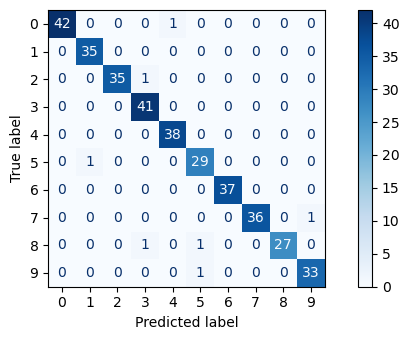

In [37]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [38]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network Test RMSE: {test_rmse}")
rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks', "rmse": [test_rmse]})])

Neural Network Test RMSE: 0.4915960401250875


We can see in the above table which digits are a problem for this model. We can see that most of our predictions are correct, but we have a small issue with 0's (one false positive where it thought a 0 was a 4), 2 (where it thought a 2 was a 3), 5's (where it thought a 5 was a 1) 7s (where it thought a 7 was a 9), 8s (where it thought a 8 was a 5, and another 8 was a 3) and 9s  (where it thought a 9 was a 5).

In the next sections, we will use hyperparameter tuning to see if we can improve the performance of this model.

NOTE: Since we don't really have a difference in cost between false positives and false negatives, and we have a relatively balanced dataset, we will use accuracy as our metric for hyperparameter tuning.

NOTE2: If we had a very unbalanced dataset, we might want to use a different metric for hyperparameter tuning. For example, if we had a dataset where 99% of the samples were 0s, and 1% of the samples were 1s, then we would want to use a different metric for hyperparameter tuning. In such imbalanced cases, we would want to use the f1-score for the 1s (since this is the class we are most concerned with). Another approach would be to under-sample the 0s (so we have a balanced dataset) and then use accuracy as our metric for hyperparameter tuning.; or similaryly, over-sample the 1s (so we have a balanced dataset) and then use accuracy as our metric for hyperparameter tuning. We will see oversampleing and undersampling in a later exercise.

## With RandomizedSearchCV

In [39]:
%%time

score_measure = "accuracy"
kfolds = 4

param_grid = {
    'hidden_layer_sizes': [ (32,), (64,), (128,), (32,16), (64,32)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [9000]
}

ann = MLPClassifier(random_state=1)
rand_search = RandomizedSearchCV(
    estimator = ann,                    # the model to use
    param_distributions=param_grid,     # the parameter grid
    cv=kfolds,                      # number of folds
    n_iter=200,                     # number of iterations; this is the number of parameter settings that are sampled
    scoring=score_measure,          # score measure used to evaluate parameter combinations
    verbose=0,                      # verbose level; the higher, the more messages. 0 for no messages
    n_jobs=-1,                      # number of parallel jobs to run >> n_jobs=-1 will utilize all available CPUs 
    random_state=1                  # random state ensures that the splits are the same for each iteration
)

rand_search.fit(X_train, y_train)

bestMLPClassifier = rand_search.best_estimator_

print(rand_search.best_params_)

{'solver': 'adam', 'max_iter': 9000, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (128,), 'alpha': 0.2, 'activation': 'relu'}
CPU times: total: 4.75 s
Wall time: 20min 3s


In [40]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    0.9722    0.9859        36
           3     1.0000    1.0000    1.0000        41
           4     1.0000    1.0000    1.0000        38
           5     0.9091    1.0000    0.9524        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     0.9655    0.9655    0.9655        29
           9     1.0000    0.9706    0.9851        34

    accuracy                         0.9889       360
   macro avg     0.9875    0.9881    0.9875       360
weighted avg     0.9896    0.9889    0.9890       360

CPU times: total: 109 ms
Wall time: 16.2 ms


[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


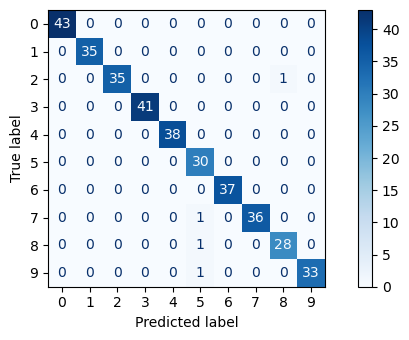

In [41]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [42]:
accuracy = bestMLPClassifier.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks random search', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])



Accuracy:           0.9889
F1 Micro:           0.9889
F1 Macro:           0.9875
F1 Weighted:        0.9890
Recall Micro:       0.9889
Recall Macro:       0.9881
Recall Weighted:    0.9881
Precision Micro:    0.9889
Precision Macro:    0.9875
Precision Weighted: 0.9875


In [43]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network random search RMSE: {test_rmse}")
rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks random search', "rmse": [test_rmse]})])

Neural Network random search RMSE: 0.42491829279939874


## With GridSearchCV

In [44]:
%%time

score_measure = "accuracy"
kfolds = 4

activation = rand_search.best_params_['activation']
solver = rand_search.best_params_['solver']
alpha = rand_search.best_params_['alpha']
learning_rate = rand_search.best_params_['learning_rate']
learning_rate_init = rand_search.best_params_['learning_rate_init']
max_iter = rand_search.best_params_['max_iter']

param_grid = {
    'hidden_layer_sizes': [ (127,63), (126,62), (125,61), (124,60), (129,65)],
    'activation': [activation],
    'solver': [solver],
    'alpha': [alpha-0.1, alpha, alpha+0.1, alpha+0.2, alpha+0.3, alpha+0.4, alpha+0.5, alpha+0.6, alpha+0.7, alpha+0.8, alpha+0.9],
    'learning_rate': [learning_rate],
    'learning_rate_init': [learning_rate_init-0.00009, learning_rate_init, learning_rate_init+0.0005],
    'max_iter': [5000]
}

ann = MLPClassifier(random_state=0)
grid_search = GridSearchCV(
    estimator = ann,        # the model that will be evaluated
    param_grid=param_grid,  # the dictionary of hyperparameters
    cv=kfolds,              # number of folds to use for k-fold cross validation
    scoring=score_measure,  # the scoring metric to optimize for
    verbose=0,              # controls the amount of diagnostic information displayed, 0 means none
    n_jobs=-1,              # Number of similtaneous threads to run to accomplish this n_jobs=-1 will utilize all available CPUs 
)
grid_search.fit(X_train, np.ravel(y_train))

bestMLPClassifier = grid_search.best_estimator_

print(grid_search.best_params_)

{'activation': 'relu', 'alpha': 0.4, 'hidden_layer_sizes': (124, 60), 'learning_rate': 'constant', 'learning_rate_init': 0.00991, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 5.47 s
Wall time: 2min 15s


In [45]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     0.9722    1.0000    0.9859        35
           2     1.0000    0.9722    0.9859        36
           3     1.0000    1.0000    1.0000        41
           4     0.9500    1.0000    0.9744        38
           5     0.9677    1.0000    0.9836        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9459    0.9722        37
           8     0.9655    0.9655    0.9655        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9833       360
   macro avg     0.9826    0.9831    0.9826       360
weighted avg     0.9838    0.9833    0.9833       360

CPU times: total: 31.2 ms
Wall time: 15.8 ms


[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


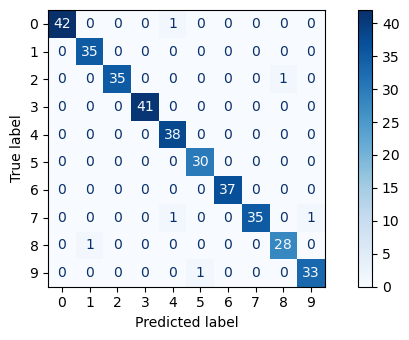

In [46]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [47]:
accuracy = bestMLPClassifier.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks grid search', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])


Accuracy:           0.9833
F1 Micro:           0.9833
F1 Macro:           0.9826
F1 Weighted:        0.9833
Recall Micro:       0.9833
Recall Macro:       0.9831
Recall Weighted:    0.9831
Precision Micro:    0.9833
Precision Macro:    0.9826
Precision Weighted: 0.9826


In [48]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network grid search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks grid search', "rmse": [test_rmse]})])

Neural Network grid search RMSE: 0.6009252125773316


### Prediction using Logestic regression

In [49]:
log_reg_model = LogisticRegression(penalty=None, max_iter=900)
_ = log_reg_model.fit(X_train,y_train)

y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     0.9706    0.9429    0.9565        35
           2     0.9730    1.0000    0.9863        36
           3     0.9535    1.0000    0.9762        41
           4     0.9500    1.0000    0.9744        38
           5     0.8750    0.9333    0.9032        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9189    0.9577        37
           8     0.9630    0.8966    0.9286        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9667       360
   macro avg     0.9656    0.9639    0.9642       360
weighted avg     0.9677    0.9667    0.9666       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


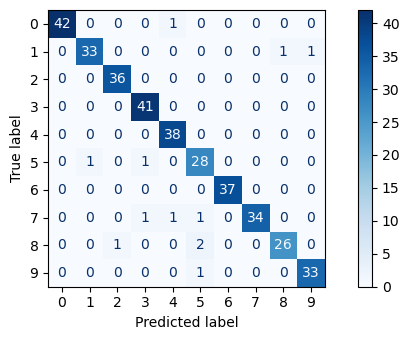

In [50]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [51]:
accuracy = log_reg_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])


Accuracy:           0.9667
F1 Micro:           0.9667
F1 Macro:           0.9642
F1 Weighted:        0.9666
Recall Micro:       0.9667
Recall Macro:       0.9639
Recall Weighted:    0.9639
Precision Micro:    0.9667
Precision Macro:    0.9656
Precision Weighted: 0.9656


In [52]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression', "rmse": [test_rmse]})])

Logestic regression Test RMSE: 0.8299933065325822


### Change to liblinear solver

In [53]:
log_reg_liblin_model = LogisticRegression(solver='liblinear').fit(X_train, np.ravel(y_train))
y_pred = log_reg_liblin_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        43
           1     1.0000    0.9714    0.9855        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    0.9756    0.9877        41
           4     0.9500    1.0000    0.9744        38
           5     0.9062    0.9667    0.9355        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9189    0.9577        37
           8     0.9310    0.9310    0.9310        29
           9     0.9143    0.9412    0.9275        34

    accuracy                         0.9722       360
   macro avg     0.9702    0.9705    0.9699       360
weighted avg     0.9733    0.9722    0.9724       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


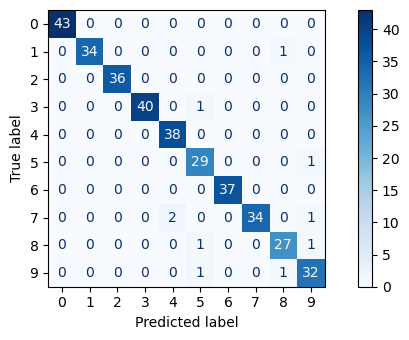

In [54]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
accuracy = log_reg_liblin_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression liblin', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])


Accuracy:           0.9722
F1 Micro:           0.9722
F1 Macro:           0.9699
F1 Weighted:        0.9724
Recall Micro:       0.9722
Recall Macro:       0.9705
Recall Weighted:    0.9705
Precision Micro:    0.9722
Precision Macro:    0.9702
Precision Weighted: 0.9702


In [56]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression liblin Test RMSE: {test_rmse}")
rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression liblin', "rmse": [test_rmse]})])

Logestic regression liblin Test RMSE: 0.5725188012439223


### L2 Regularization

In [57]:
log_reg_L2_model = LogisticRegression(penalty='l2', max_iter=1000)
_ = log_reg_L2_model.fit(X_train, np.ravel(y_train))

y_pred = log_reg_L2_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        43
           1     0.9714    0.9714    0.9714        35
           2     1.0000    1.0000    1.0000        36
           3     0.9762    1.0000    0.9880        41
           4     1.0000    1.0000    1.0000        38
           5     0.9032    0.9333    0.9180        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     1.0000    0.9655    0.9825        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9833       360
   macro avg     0.9821    0.9814    0.9817       360
weighted avg     0.9837    0.9833    0.9834       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


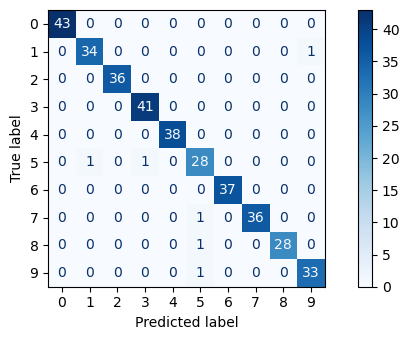

In [58]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [59]:
accuracy = log_reg_L2_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression L2', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])


Accuracy:           0.9833
F1 Micro:           0.9833
F1 Macro:           0.9817
F1 Weighted:        0.9834
Recall Micro:       0.9833
Recall Macro:       0.9814
Recall Weighted:    0.9814
Precision Micro:    0.9833
Precision Macro:    0.9821
Precision Weighted: 0.9821


In [60]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression L2 Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression  L2', "rmse": [test_rmse]})])

Logestic regression L2 Test RMSE: 0.5602578771323871


### L1 Regularization

In [61]:
log_reg_L1_model = LogisticRegression(solver='liblinear', penalty='l1')
_ = log_reg_L1_model.fit(X_train, np.ravel(y_train))

y_pred = log_reg_L1_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9773    1.0000    0.9885        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    0.9722    0.9859        36
           3     1.0000    0.9756    0.9877        41
           4     1.0000    1.0000    1.0000        38
           5     0.9062    0.9667    0.9355        30
           6     1.0000    1.0000    1.0000        37
           7     0.9730    0.9730    0.9730        37
           8     1.0000    0.9655    0.9825        29
           9     0.9412    0.9412    0.9412        34

    accuracy                         0.9806       360
   macro avg     0.9798    0.9794    0.9794       360
weighted avg     0.9811    0.9806    0.9807       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


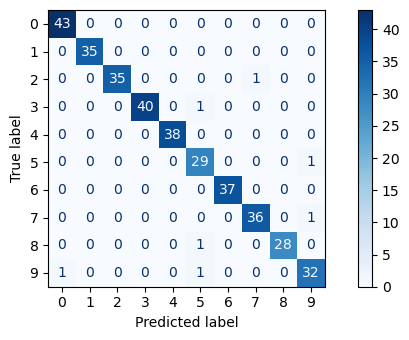

In [62]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [63]:
accuracy = log_reg_L1_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression L1', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])


Accuracy:           0.9806
F1 Micro:           0.9806
F1 Macro:           0.9794
F1 Weighted:        0.9807
Recall Micro:       0.9806
Recall Macro:       0.9794
Recall Weighted:    0.9794
Precision Micro:    0.9806
Precision Macro:    0.9798
Precision Weighted: 0.9798


In [64]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression L1 Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression L1', "rmse": [test_rmse]})])

Logestic regression L1 Test RMSE: 0.6561673228343176


### Elastic Net Regularization

In [65]:
log_reg_elastic_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1500)
_ = log_reg_elastic_model.fit(X_train, np.ravel(y_train))

y_pred = log_reg_liblin_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        43
           1     1.0000    0.9714    0.9855        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    0.9756    0.9877        41
           4     0.9500    1.0000    0.9744        38
           5     0.9062    0.9667    0.9355        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9189    0.9577        37
           8     0.9310    0.9310    0.9310        29
           9     0.9143    0.9412    0.9275        34

    accuracy                         0.9722       360
   macro avg     0.9702    0.9705    0.9699       360
weighted avg     0.9733    0.9722    0.9724       360



[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


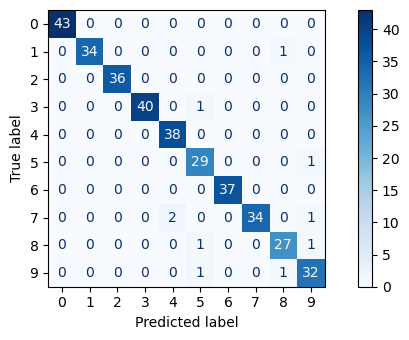

In [66]:
# for reference, list the frequency of each digit found in the y_test data
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
accuracy = log_reg_elastic_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f"{'F1 Micro:':20s}{f1_micro:.4f}")

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"{'F1 Macro:':20s}{f1_macro:.4f}")

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"{'F1 Weighted:':20s}{f1_weighted:.4f}")


recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"{'Recall Micro:':20s}{recall_micro:.4f}")

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"{'Recall Macro:':20s}{recall_macro:.4f}")

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f"{'Recall Weighted:':20s}{recall_macro:.4f}")


precision_micro = precision_score(y_test, y_pred, average='micro')
print(f"{'Precision Micro:':20s}{precision_micro:.4f}")

precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"{'Precision Macro:':20s}{precision_macro:.4f}")

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f"{'Precision Weighted:':20s}{precision_macro:.4f}")

performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression Elastic', "accuracy": [accuracy], 
                                                    "f1_micro": [f1_micro], "f1_macro": [f1_macro], "f1_weighted": [f1_weighted],
                                                    "recall_micro": [recall_micro], "recall_macro": [recall_macro], "recall_weighted": [recall_weighted], 
                                                    "precision_micro": [precision_micro], "precision_macro": [precision_macro], "precision_weighted": [precision_weighted]})])

Accuracy:           0.9833
F1 Micro:           0.9722
F1 Macro:           0.9699
F1 Weighted:        0.9724
Recall Micro:       0.9722
Recall Macro:       0.9705
Recall Weighted:    0.9705
Precision Micro:    0.9722
Precision Macro:    0.9702
Precision Weighted: 0.9702


In [68]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression Elastic', "rmse": [test_rmse]})])

Logestic regression Test RMSE: 0.5725188012439223


In [69]:
rmses

,model,rmse
0,Neural Networks,0.491596
0,Neural Networks random search,0.424918
0,Neural Networks grid search,0.600925
0,Logestic Regression,0.829993
0,Logestic Regression liblin,0.572519
0,Logestic Regression L2,0.560258
0,Logestic Regression L1,0.656167
0,Logestic Regression Elastic,0.572519


In [70]:
performance

,model,accuracy,f1_micro,f1_macro,f1_weighted,recall_micro,recall_macro,recall_weighted,precision_micro,precision_macro,precision_weighted
0,Neural Networks,0.980556,0.980556,0.979526,0.980573,0.980556,0.979023,0.980556,0.980556,0.980614,0.981142
0,Neural Networks random search,0.988889,0.988889,0.987519,0.989028,0.988889,0.988130,0.988889,0.988889,0.987461,0.989646
0,Neural Networks grid search,0.983333,0.983333,0.982636,0.983334,0.983333,0.983102,0.983333,0.983333,0.982607,0.983778
0,Logestic Regression,0.966667,0.966667,0.964174,0.966641,0.966667,0.963899,0.966667,0.966667,0.965560,0.967685
0,Logestic Regression liblin,0.972222,0.972222,0.969932,0.972360,0.972222,0.970483,0.972222,0.972222,0.970157,0.973259
0,Logestic Regression L2,0.983333,0.983333,0.981676,0.983421,0.983333,0.981384,0.983333,0.983333,0.982143,0.983668
0,Logestic Regression L1,0.980556,0.980556,0.979417,0.980690,0.980556,0.979417,0.980556,0.980556,0.979767,0.981140
0,Logestic Regression Elastic,0.983333,0.972222,0.969932,0.972360,0.972222,0.970483,0.972222,0.972222,0.970157,0.973259


### Conclusion

Based on the above results, the following conclusions can be drawn:

* The Neural Networks with a random search performs the best in terms of accuracy, precision, recall, and F1 score. The Neural Networks with random search achieved the highest accuracy (0.988889), precision (0.988889), recall (0.988889), and F1 scores (0.988889 micro and 0.987519 macro), indicating that this model predicted the majority of the MNIST data correctly.

* Looking at other metrics, we can see that the Neural Networks with a random search also achieved the highest weighted F1 score (0.989028), precision (0.989646), and recall (0.988130). These values indicate that the model had an excellent balance between precision (how many of the items that it labeled as positive are truly positive) and recall (how many of the true positives it was able to find), which also directly contributes to the high F1 score, as it is the harmonic mean of precision and recall. 

* The models trained using Logistic Regression, including variants with L1 and L2 regularization, liblinear solver, and Elastic Net, show a respectable performance but are noticeably outperformed by the Neural Networks models, with the Neural Networks random search variant in particular.

* Although RMSE is not the primary performance metric in this scenario, a lower RMSE score does indicate a better fit of the model. Here, the Neural Networks random search model also outperforms others with the lowest RMSE of 0.424918, further solidifying its place as the best-performing model.

Regarding cost of having FN, FP

* True Positives (TP): These are the correctly identified digits. A high number of TPs is desirable because it demonstrates the model's ability to accurately recognize and categorize the handwritten digits.

* False Positives (FP): These are instances where the model incorrectly identifies a digit. For example, the model predicts a digit to be '8' when it's actually '3'. The cost of a FP could be considered relatively low compared to high-stakes scenarios such as medical diagnoses or fraud detection. However, a high number of FPs could indicate that the model is overly sensitive, leading to many incorrect classifications and reducing the system's overall reliability.

* True Negatives (TN): These are the also correctly identified digits. A high number of TNs is also desirable because it demonstrates the model's ability to accurately recognize and categorize the handwritten digits.

* False Negatives (FN): These are instances where the model fails to identify a digit correctly. For example, the model predicts a digit to be '2' when it's actually '8'. The cost of FNs in the MNIST dataset context could lead to misclassifications, impacting the overall performance of the system.